# 라이브러리 및 파일

In [1]:
# 필요한 라이브러리 불러오기
# 데이터 핸들링을 위한 라이브러리
import numpy as np
import pandas as pd

# 데이터 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')  # matplotlib style 설정

# 문법 변경에 의한 경고를 무시
import warnings

warnings.filterwarnings('ignore')

# matplotlib 시각화 결과를 jupyter notebook에서 바로 볼 수 있게 해주는 command
%matplotlib inline

In [2]:
# 그래프 서식 설정
parameters = {
    'axes.titlesize': 25,
    'axes.labelsize': 20,
    'ytick.labelsize': 20
}
plt.rcParams.update(parameters)



## load the data

In [3]:
data = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


In [313]:
# Attrition YES=1, NO=0
data.loc[data.Attrition=='Yes','Attrition']=1
data.loc[data.Attrition=='No','Attrition']=0

In [314]:
data['Attrition']=data['Attrition'].astype('float')

In [315]:
# BeforeWorkingYears 변수 생성
data.loc[:,'BeforeWorkingYears']=data.TotalWorkingYears-data.YearsAtCompany
data.drop(['TotalWorkingYears', 'YearsAtCompany'], axis=1, inplace=True)
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BeforeWorkingYears
0,41,1.0,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,80,0,0,1,4,0,5,2
1,49,0.0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,80,1,3,3,7,1,7,0
2,37,1.0,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,80,0,3,3,0,0,0,7
3,33,0.0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,80,0,3,3,7,3,0,0
4,27,0.0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,80,1,3,3,2,2,2,4


## 핵심인재 분류

In [440]:
data['SalaryHike_range'] = pd.qcut(data['PercentSalaryHike'], q=4,labels=[1,2,3,4])
data_talent = data[(data['SalaryHike_range']==4) & (data['Age']<=33)]
data_normal = data[~(data['SalaryHike_range']==4) | ~(data['Age']<=33)]
data_mz =  data[(data['Age']<34)]
data_not_talent_mz= data[~(data['SalaryHike_range']==4) & (data['Age']<34)]

In [441]:
data_talent

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BeforeWorkingYears,SalaryHike_range,Age_band
7,30,0.0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,80,1,2,3,0,0,0,0,4,1
26,32,1.0,Travel_Frequently,1125,Research & Development,16,1,Life Sciences,33,2,...,80,0,5,3,2,6,7,0,4,1
39,33,0.0,Travel_Frequently,1141,Sales,1,3,Life Sciences,52,3,...,80,2,3,3,3,1,3,5,4,1
44,30,0.0,Travel_Frequently,721,Research & Development,1,2,Medical,57,3,...,80,0,2,3,8,3,7,0,4,1
54,26,0.0,Travel_Rarely,1443,Sales,23,3,Marketing,72,3,...,80,1,2,2,2,0,0,3,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,32,0.0,Travel_Rarely,801,Sales,1,4,Marketing,2016,3,...,80,2,3,3,10,5,7,0,4,1
1433,25,0.0,Travel_Rarely,1382,Sales,8,2,Other,2018,1,...,80,1,3,2,3,0,4,1,4,0
1438,23,1.0,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,...,80,1,3,2,0,1,0,0,4,0
1463,31,0.0,Non-Travel,325,Research & Development,5,3,Medical,2057,2,...,80,0,2,3,4,1,7,1,4,1


## 핵심인재 특성

In [442]:
print("mz핵심인재 평균나이 : ", data_talent['Age'].mean(),"\n그외 평균나이 : ",data_normal['Age'].mean())

mz핵심인재 평균나이 :  28.112 
그외 평균나이 :  37.74275092936803


In [443]:
print('mz핵심인재 퇴사율:',data_talent[data_talent['Attrition']==1].count()['Attrition']/data_talent['Attrition'].count())
print('그 외 집단 퇴사율:',data_normal[data_normal['Attrition']==1].count()['Attrition']/data_normal['Attrition'].count())
print('전체 퇴사율:',data[data['Attrition']==1].count()['Attrition']/data['Attrition'].count())

mz핵심인재 퇴사율: 0.216
그 외 집단 퇴사율: 0.15613382899628253
전체 퇴사율: 0.16122448979591836


In [447]:
print("MZ 핵심인재 평균월급 : %.2f \t\t 핵심인재 아닌 그룹 평균월급 : %.2f" %(data_talent['MonthlyIncome'].mean(),data_normal['MonthlyIncome'].mean()))
print("전체 MZ직원 평균월급 : %.2f \t\t 핵심인재 아닌 MZ평균월급 : %.2f" %(data_mz['MonthlyIncome'].mean(),data_not_talent_mz['MonthlyIncome'].mean()))
print('전체 직원의 평균월급: %.2f' %(data['MonthlyIncome'].mean()))

MZ 핵심인재 평균월급 : 4570.37 		 핵심인재 아닌 그룹 평균월급 : 6682.54
전체 MZ직원 평균월급 : 4361.53 		 핵심인재 아닌 MZ평균월급 : 4303.39
전체 직원의 평균월급: 6502.93


# 핵심인재 인적사항

## Gender

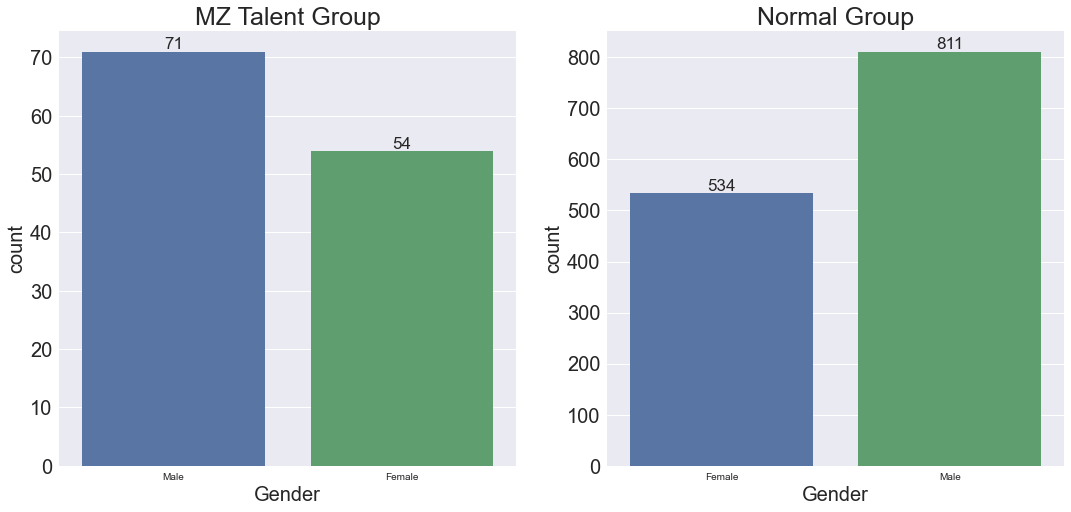

In [459]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='Gender', ax=ax[0])
ax[0].set_title('MZ Talent Group')
sns.countplot(data=data_normal, x='Gender', ax=ax[1])
ax[1].set_title('Normal Group')

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [448]:
pd.crosstab(data_talent.Attrition,data_talent.Gender, margins=True).style.background_gradient(cmap='summer_r')

Gender,Female,Male,All
Attrition,,,
0.0,41,57,98
1.0,13,14,27
All,54,71,125


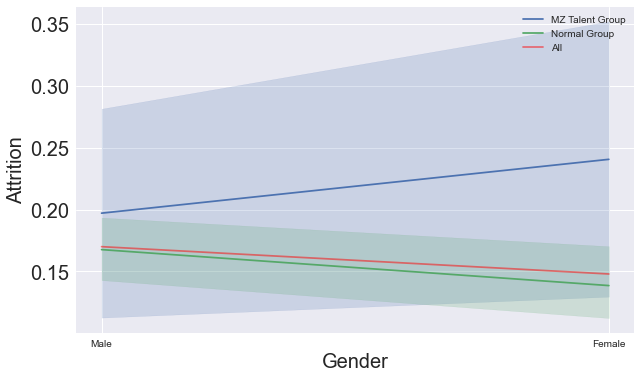

In [536]:
plt.figure(figsize=(10,6))
sns.lineplot('Gender', 'Attrition', data=data_talent)
sns.lineplot('Gender', 'Attrition', data=data_normal)
sns.lineplot('Gender', 'Attrition', data=data.groupby('Gender').mean(), color='r', alpha=0.5)
plt.legend(['MZ Talent Group', 'Normal Group', 'All'])
plt.show()

**핵심인재 그룹은 여성의 퇴사율이 더 높다.**
- 여성을 잡아둘 방법을 생각해야할 듯

## Education

1: 'Below College' 2: 'College' 3: 'Bachelor' 4: 'Master' 5: 'Doctor'

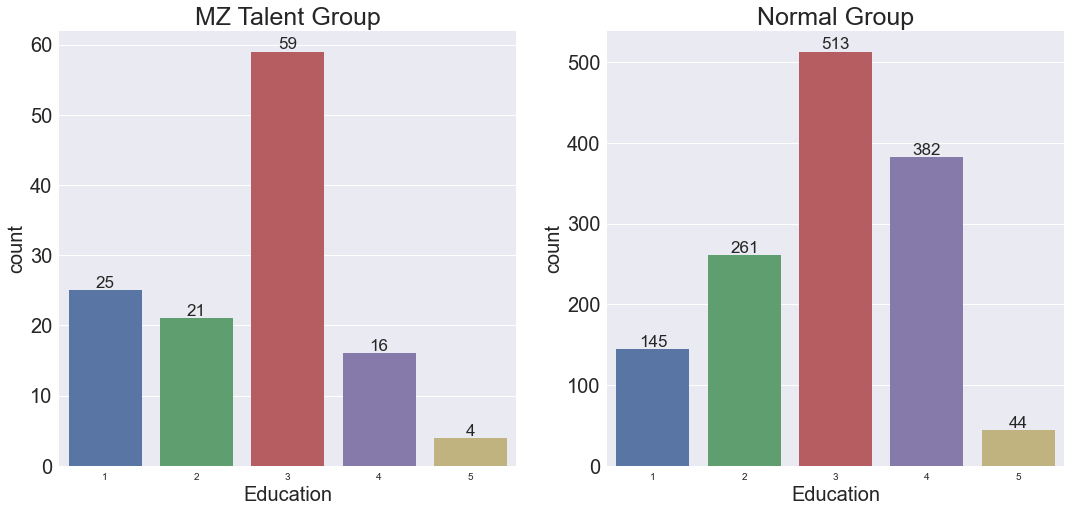

In [497]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='Education', ax=ax[0])
ax[0].set_title('MZ Talent Group')

sns.countplot(data=data_normal, x='Education', ax=ax[1])
ax[1].set_title('Normal Group')

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [462]:
pd.crosstab(data_talent.Attrition,data_talent.Education, margins=True).style.background_gradient(cmap='summer_r')

Education,1,2,3,4,5,All
Attrition,,,,,,
0.0,18,17,45,14,4,98
1.0,7,4,14,2,0,27
All,25,21,59,16,4,125


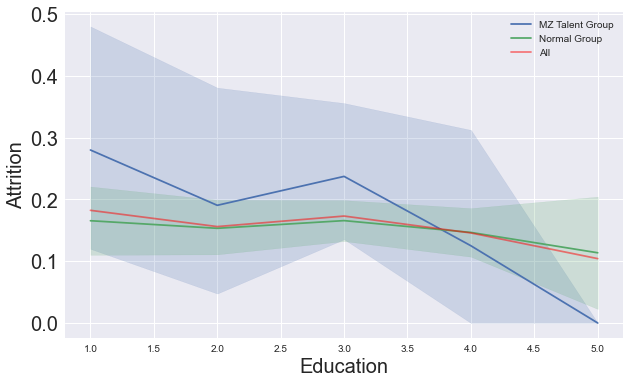

In [535]:
plt.figure(figsize=(10,6))
sns.lineplot('Education', 'Attrition', data=data_talent)
sns.lineplot('Education', 'Attrition', data=data_normal)
sns.lineplot('Education', 'Attrition', data=data.groupby('Education').mean(), color='r', alpha=0.5)
plt.legend(['MZ Talent Group', 'Normal Group', 'All'])
plt.show()

* **학력이 석사 이하인 핵심인재의 퇴사율이 높음**

In [515]:
pd.crosstab(data_talent.Gender,data_talent.Education, margins=True).style.background_gradient(cmap='summer_r')

Education,1,2,3,4,5,All
Gender,,,,,,
Female,11,7,27,8,1,54
Male,14,14,32,8,3,71
All,25,21,59,16,4,125


In [512]:
data_talent.groupby(['Attrition', 'Gender', 'Education'])[['Education']].count()

Education
Attrition Gender Education           
0.0       Female 1                  7
                 2                  5
                 3                 21
                 4                  7
                 5                  1
          Male   1                 11
                 2                 12
                 3                 24
                 4                  7
                 5                  3
1.0       Female 1                  4
                 2                  2
                 3                  6
                 4                  1
          Male   1                  3
                 2                  2
                 3                  8
                 4                  1

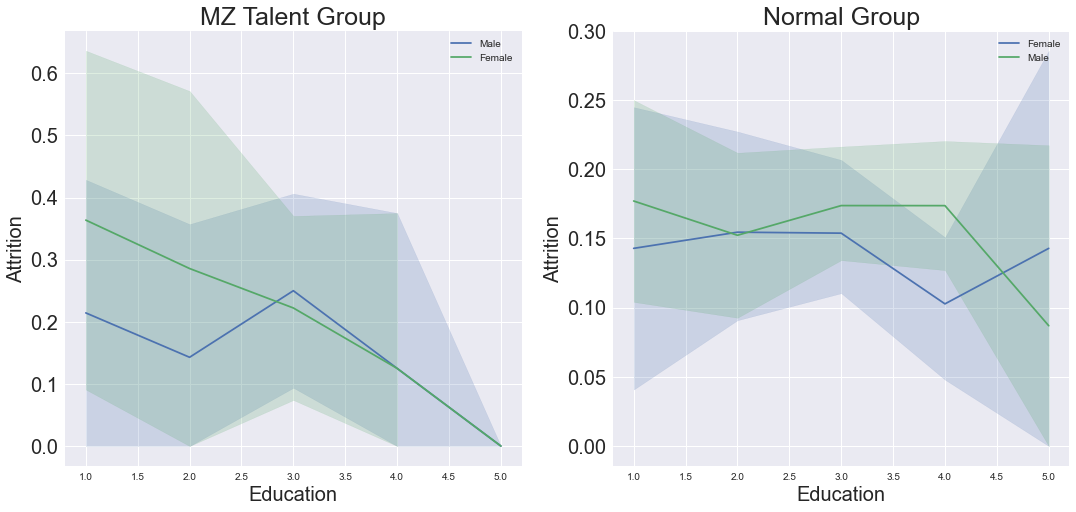

In [499]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('Education', 'Attrition', data=data_talent, hue='Gender', ax=ax[0])
ax[0].legend()
ax[0].set_title('MZ Talent Group')

sns.lineplot('Education', 'Attrition', data=data_normal, hue='Gender', ax=ax[1])
ax[1].legend()
ax[1].set_title('Normal Group')

plt.show()

**대학 이하의 학력을 가진 여성의 퇴사율이 상대적으로 높음**

## EducationField

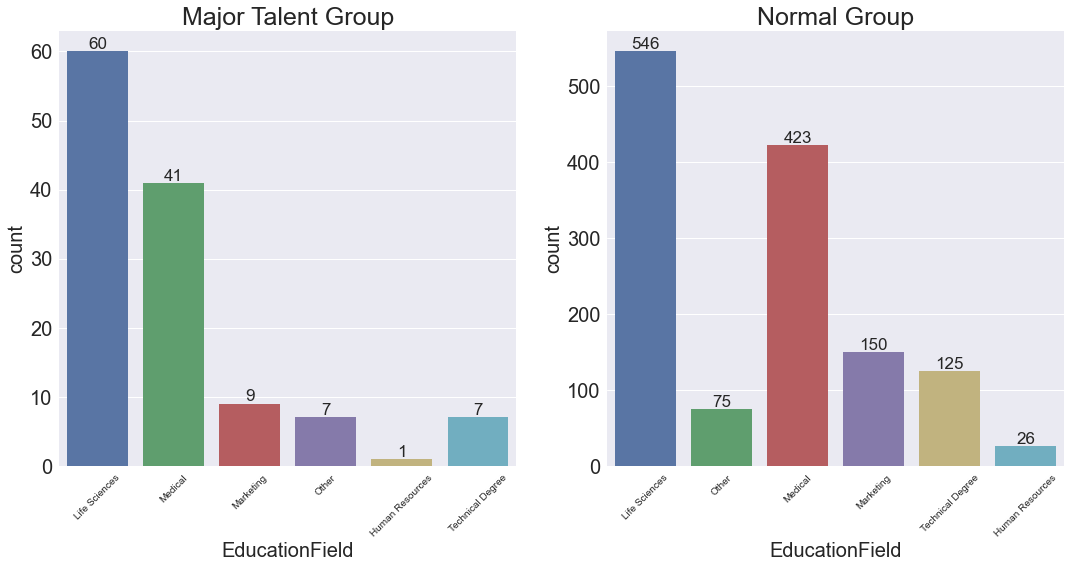

In [422]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='EducationField', ax=ax[0])
ax[0].set_title('Major Talent Group')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

sns.countplot(data=data_normal, x='EducationField', ax=ax[1])
ax[1].set_title('Normal Group')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [484]:
pd.crosstab(data_talent.Attrition,data_talent.EducationField, margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Attrition,,,,,,,
0.0,1,48,6,34,6,3,98
1.0,0,12,3,7,1,4,27
All,1,60,9,41,7,7,125


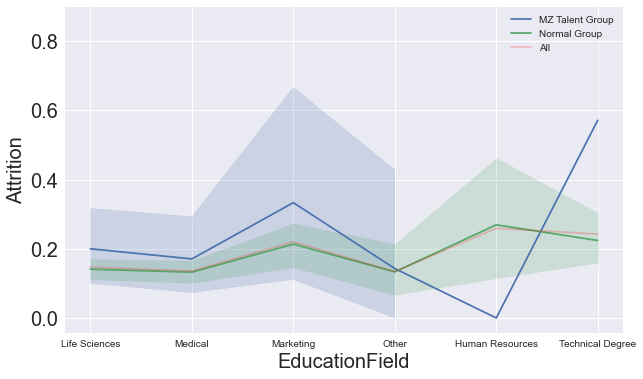

In [540]:
plt.figure(figsize=(10,6))
sns.lineplot('EducationField', 'Attrition', data=data_talent)
sns.lineplot('EducationField', 'Attrition', data=data_normal)
sns.lineplot('EducationField', 'Attrition', data=data.groupby('EducationField').mean(), color='r', alpha=0.2)
plt.legend(['MZ Talent Group', 'Normal Group','All'])
plt.show()

**HR을 공부한 사람들의 퇴사율만 낮음 => 근데 이거는 1명으로 나온 데이터라 무의미함**

In [545]:
data_talent.groupby(['Attrition', 'Gender', 'EducationField'])[['EducationField']].count()

EducationField
Attrition Gender EducationField                  
0.0       Female Life Sciences                 16
                 Marketing                      3
                 Medical                       17
                 Other                          4
                 Technical Degree               1
          Male   Human Resources                1
                 Life Sciences                 32
                 Marketing                      3
                 Medical                       17
                 Other                          2
                 Technical Degree               2
1.0       Female Life Sciences                  6
                 Marketing                      1
                 Medical                        4
                 Other                          1
                 Technical Degree               1
          Male   Life Sciences                  6
                 Marketing                      2
                 Medical                        3
                 Technical Degree               3

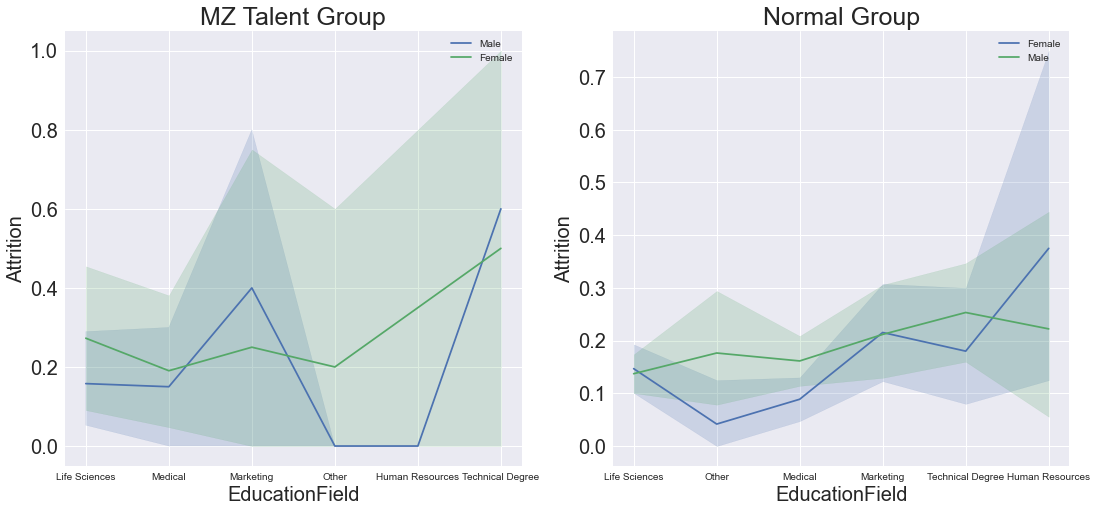

In [544]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('EducationField', 'Attrition', data=data_talent, hue='Gender', ax=ax[0])
ax[0].legend()
ax[0].set_title('MZ Talent Group')

sns.lineplot('EducationField', 'Attrition', data=data_normal, hue='Gender', ax=ax[1])
ax[1].legend()
ax[1].set_title('Normal Group')

plt.show()

**인원이 적어서 큰 의미 없어보이기는 하지만 그럼에도 불구하고 전반적으로 여성이 더 많이 퇴사하는 것은 여기서도 드러남**

## MaritalStatus

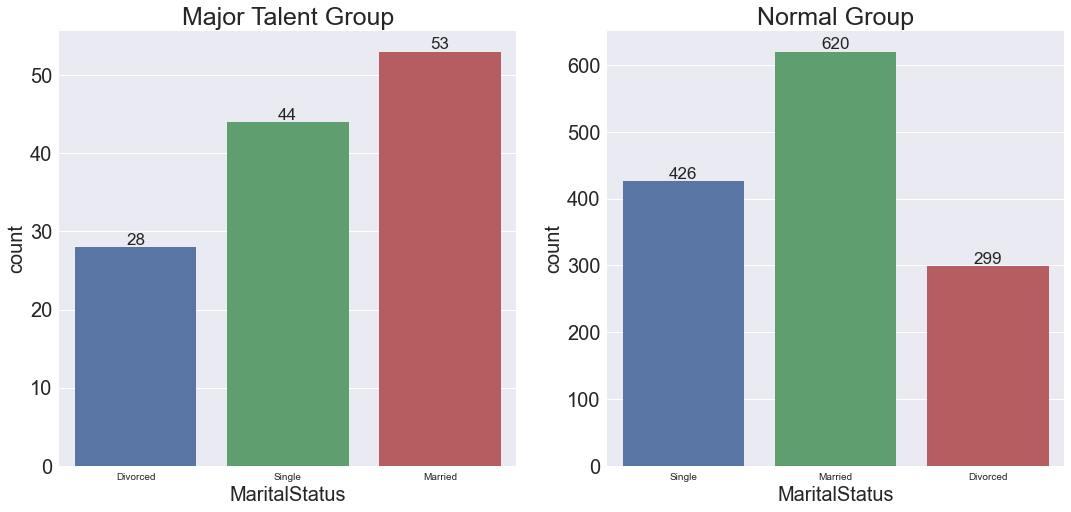

In [551]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='MaritalStatus', ax=ax[0])
ax[0].set_title('Major Talent Group')


sns.countplot(data=data_normal, x='MaritalStatus', ax=ax[1])
ax[1].set_title('Normal Group')

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [487]:
pd.crosstab(data_talent.Attrition,data_talent.MaritalStatus, margins=True).style.background_gradient(cmap='summer_r')

MaritalStatus,Divorced,Married,Single,All
Attrition,,,,
0.0,25,48,25,98
1.0,3,5,19,27
All,28,53,44,125


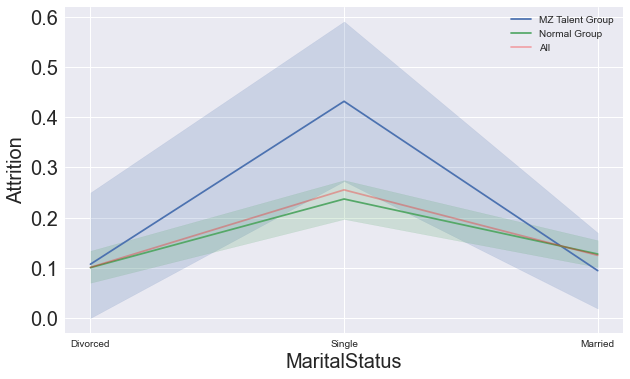

In [554]:
plt.figure(figsize=(10,6))
sns.lineplot('MaritalStatus', 'Attrition', data=data_talent)
sns.lineplot('MaritalStatus', 'Attrition', data=data_normal)
sns.lineplot('MaritalStatus', 'Attrition', data=data.groupby('MaritalStatus').mean(), color='r', alpha=0.3)
plt.legend(['MZ Talent Group', 'Normal Group', 'All'])
plt.show()

**어린 single의 퇴사율이 높은거는 진짜 문제인 듯** 왜 탈주할까...

In [555]:
data_talent.groupby(['Attrition', 'Gender', 'MaritalStatus'])[['MaritalStatus']].count()

MaritalStatus
Attrition Gender MaritalStatus               
0.0       Female Divorced                  10
                 Married                   19
                 Single                    12
          Male   Divorced                  15
                 Married                   29
                 Single                    13
1.0       Female Divorced                   1
                 Married                    3
                 Single                     9
          Male   Divorced                   2
                 Married                    2
                 Single                    10

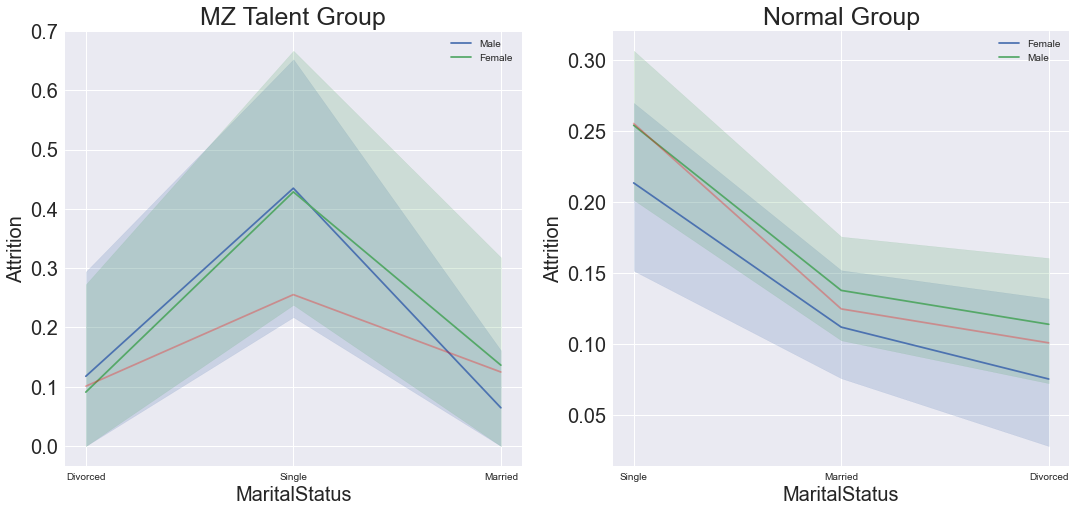

In [560]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('MaritalStatus', 'Attrition', data=data_talent, hue='Gender', ax=ax[0])
sns.lineplot('MaritalStatus', 'Attrition', data=data.groupby('MaritalStatus').mean(), color='r', alpha=0.3, ax=ax[0])
ax[0].legend()
ax[0].set_title('MZ Talent Group')

sns.lineplot('MaritalStatus', 'Attrition', data=data_normal, hue='Gender', ax=ax[1])
sns.lineplot('MaritalStatus', 'Attrition', data=data.groupby('MaritalStatus').mean(), color='r', alpha=0.3, ax=ax[1])
ax[1].legend()
ax[1].set_title('Normal Group')

plt.show()

성별+결혼상태는 큰 차이 없음

## NumCompaniesWorked

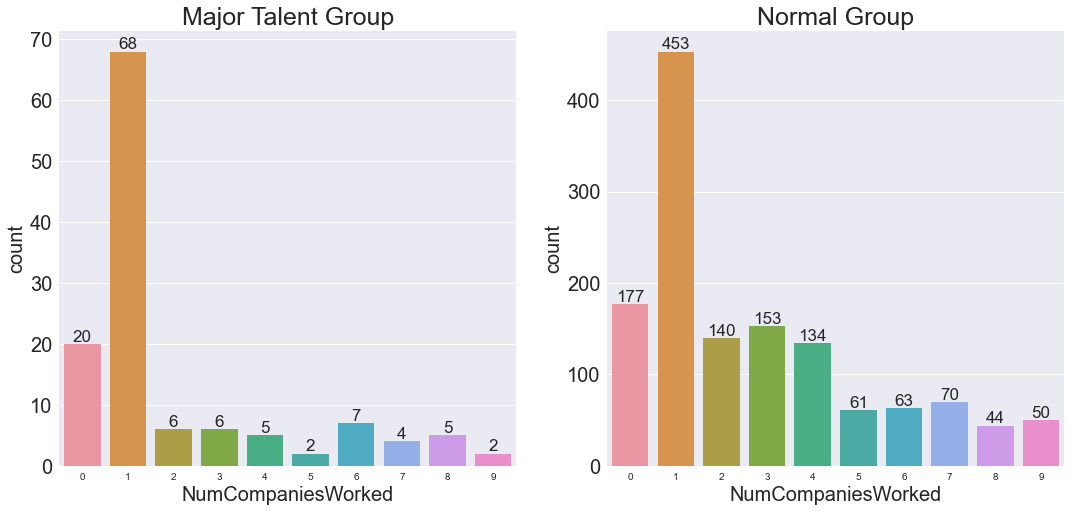

In [489]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot(data=data_talent, x='NumCompaniesWorked', ax=ax[0])
ax[0].set_title('Major Talent Group')

sns.countplot(data=data_normal, x='NumCompaniesWorked', ax=ax[1])
ax[1].set_title('Normal Group')

for a in ax:
    for p in a.patches:
        a.annotate(format(p.get_height(),".0f"), (p.get_x()+p.get_width()/2.0, p.get_height()),
                   ha='center', va='center', size=17, xytext=(0,7), textcoords='offset points')

plt.show()

In [490]:
pd.crosstab(data_talent.Attrition,data_talent.NumCompaniesWorked, margins=True).style.background_gradient(cmap='summer_r')

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9,All
Attrition,,,,,,,,,,,
0.0,16,52,5,6,4,2,5,2,5,1,98
1.0,4,16,1,0,1,0,2,2,0,1,27
All,20,68,6,6,5,2,7,4,5,2,125


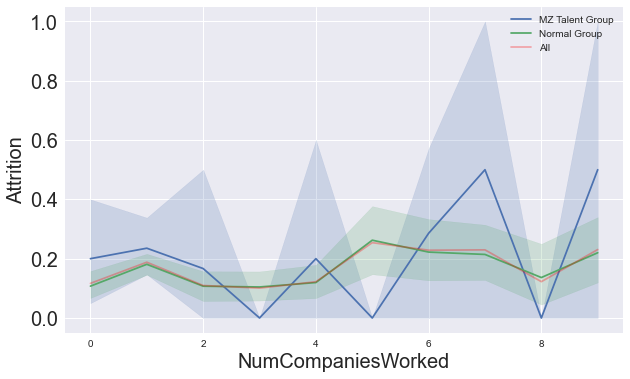

In [561]:
plt.figure(figsize=(10,6))
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data_talent)
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data_normal)
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data.groupby('NumCompaniesWorked').mean(), color='r', alpha=0.3)
plt.legend(['MZ Talent Group', 'Normal Group','All'])
plt.show()

**전에 다닌 회사 수가 6,7,9일 때 퇴사율이 올라가기는 하지만 인원 수가 너무 적음** -단정하기 위험함

In [562]:
data_talent.groupby(['Attrition', 'Gender', 'NumCompaniesWorked'])[['NumCompaniesWorked']].count()

NumCompaniesWorked
Attrition Gender NumCompaniesWorked                    
0.0       Female 0                                    5
                 1                                   24
                 2                                    3
                 4                                    3
                 5                                    1
                 6                                    2
                 7                                    1
                 8                                    2
          Male   0                                   11
                 1                                   28
                 2                                    2
                 3                                    6
                 4                                    1
                 5                                    1
                 6                                    3
                 7                                    1
                 8                                    3
                 9                                    1
1.0       Female 0                                    2
                 1                                    6
                 2                                    1
                 6                                    2
                 7                                    2
          Male   0                                    2
                 1                                   10
                 4                                    1
                 9                                    1

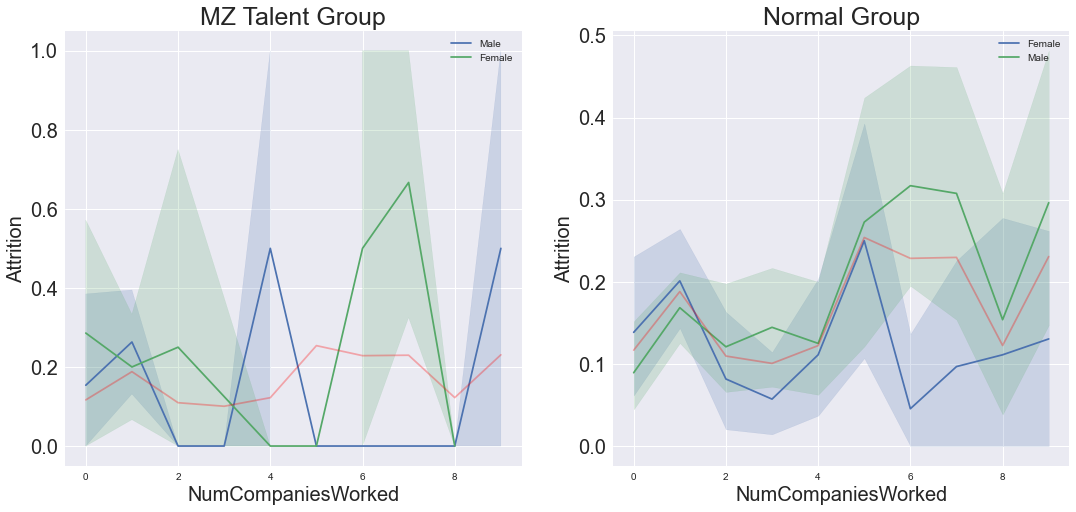

In [563]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data_talent, hue='Gender', ax=ax[0])
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data.groupby('NumCompaniesWorked').mean(), color='r', alpha=0.3, ax=ax[0])
ax[0].legend()
ax[0].set_title('MZ Talent Group')

sns.lineplot('NumCompaniesWorked', 'Attrition', data=data_normal, hue='Gender', ax=ax[1])
sns.lineplot('NumCompaniesWorked', 'Attrition', data=data.groupby('NumCompaniesWorked').mean(), color='r', alpha=0.3, ax=ax[1])
ax[1].legend()
ax[1].set_title('Normal Group')

plt.show()

- 이것도 인원이 너무 적어져서 그닥..